<a href="https://colab.research.google.com/github/ssunwalka01/LIAR-LIAR-Dataset-FAKE_NEWS_Classification/blob/master/12November2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIAR LIAR Dataset Clasification (Fake-News Analysis)

Let’s look at the steps that we will follow in this course.

- Problem Statement
- Hypothesis Generation
- Getting the system ready and loading the data
- Understanding the data
- Exploratory Data Analysis (EDA)
- Univariate Analysis
- Bivariate Analysis
- Missing value and outlier treatment
- Evaluation Metrics for classification problems
-    Model Building : Part I
- Logistic Regression using stratified k-folds cross validation
- Feature Engineering
- Model Building : Part II
- Logistic Regression
- Decision tree
- Random Forest
- XGBoost
Lets look at each section in detail.

It is a classification problem where we have to predict whether a News Statement would be classified as Fake or Not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:

- Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.
- Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

In [0]:
# importing packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [0]:
##################
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#from sklearn.cross_validation import data_test_split
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import nltk
import re
import codecs
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Data

For this practice problem, we have been given three CSV files: data, data and sample submission.

- Train file will be used for dataing the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
- Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the data data.
- Sample submission file contains the format in which we have to submit our predictions.

- Let's start with loading the data
PS: The data was in 'tsv' format which is then converted into 'csv' format later for analysing purpose.
The Dataset available for the research purpose containg data,test and validation sets.

In [0]:
# converting data, data, and valid datasets into csv format
#data
tsv_file='/content/train.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('train_converted.csv',index=False)

In [0]:
#test
tsv_file1='/content/test.tsv'
csv_table1=pd.read_table(tsv_file1,sep='\t')
csv_table1.to_csv('test_converted.csv',index=False)

In [0]:
#valid
tsv_file2='/content/valid.tsv'
csv_table2=pd.read_table(tsv_file2,sep='\t')
csv_table2.to_csv('valid_converted.csv',index=False)

# Reading Data

In [0]:
train=pd.read_csv('/content/train_converted.csv')
test=pd.read_csv('/content/test_converted.csv')
valid=pd.read_csv('/content/valid_converted.csv')

In [444]:
train.columns

Index(['2635.json', 'false',
       'Says the Annies List political group supports third-trimester abortions on demand.',
       'abortion', 'dwayne-bohac', 'State representative', 'Texas',
       'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer'],
      dtype='object')

In [0]:
# Naming columns
train.columns=["ID","Label","Statement","Subject(s)","Speaker","Speaker's job title","state info","party affiliation","barely true counts","false counts","half true counts","mostly true counts","pants on fire counts","the context (venue/location of speech or statement)"]

In [446]:
train.head()

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [447]:
train.shape

(10239, 14)

In [448]:
test.shape

(1266, 14)

In [449]:
valid.shape

(1283, 14)

In [0]:
# Naming columns 
test.columns=["ID","Label","Statement","Subject(s)","Speaker","Speaker's job title","state info","party affiliation","barely true counts","false counts","half true counts","mostly true counts","pants on fire counts","the context (venue/location of speech or statement)"]

In [0]:
# Naming columns 
valid.columns=["ID","Label","Statement","Subject(s)","Speaker","Speaker's job title","state info","party affiliation","barely true counts","false counts","half true counts","mostly true counts","pants on fire counts","the context (venue/location of speech or statement)"]

Let’s make a copy of data and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.


In [0]:
train_copy=pd.read_csv('train.csv').copy()
test_copy=pd.read_csv('test.csv').copy()
valid_copy=pd.read_csv('valid.csv').copy()

In [0]:
data = pd.concat([data, test, valid])

In [454]:
data.head(10)

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540,half-true,declin coal start start natur ga took start be...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324,mostly-true,hillari clinton agr john mccain give georg bus...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123,false,reform legisl like mandat free sex chang surgeri,health-care,blog-posting,Unknown,Unknown1,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028,half-true,econom turnaround start end term,"economy,jobs",charlie-crist,Unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465,true,chicago bear start quarterback total number te...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
5,2342,barely-true,jim dunnam live district repr,candidates-biography,republican-party-texas,Unknown,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
6,153,half-true,im person stage work activ pass along russ fei...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
7,5602,half-true,howev took oregon lotteri fund port newport ev...,jobs,oregon-lottery,Unknown,Unknown1,organization,0.0,0.0,1.0,0.0,1.0,a website
8,9741,mostly-true,gop primari oppon glenn grothman joe leibham c...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video
9,7115,mostly-true,first histori share popular margin smaller lat...,elections,robert-menendez,U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,a speech


In [455]:
data.shape

(28082, 14)

Loaded the datasets. Let's move to Univariate Analysis

- Combining data and validation sets here. Later We will use validation techniques

# Univariate Analysis

In [456]:
data['Label'].value_counts(normalize=True)
# Read as percentage after multiplying by 100

half-true      0.203155
false          0.198633
mostly-true    0.192508
barely-true    0.170572
true           0.153408
pants-fire     0.081725
Name: Label, dtype: float64

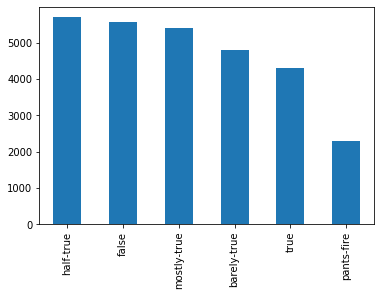

In [457]:
data['Label'].value_counts().plot.bar()

On Looking at the datsets, we identified that there are 3 Data Types:
- Continuous : ID, barely true counts, false counts, half true counts, mostly true counts, pants on fire counts.

- Categorical : Label, Subject(s), Speaker, Speaker's job title, State info, party affiliation, the context (venue/location of speech or statement)

- Text : Statement

Let's go for Continuous Data Type Exploration.
We know that we use BarGraphs for Categorical variable, Histogram or ScatterPlot for continuous variables.

- Continuous Variables

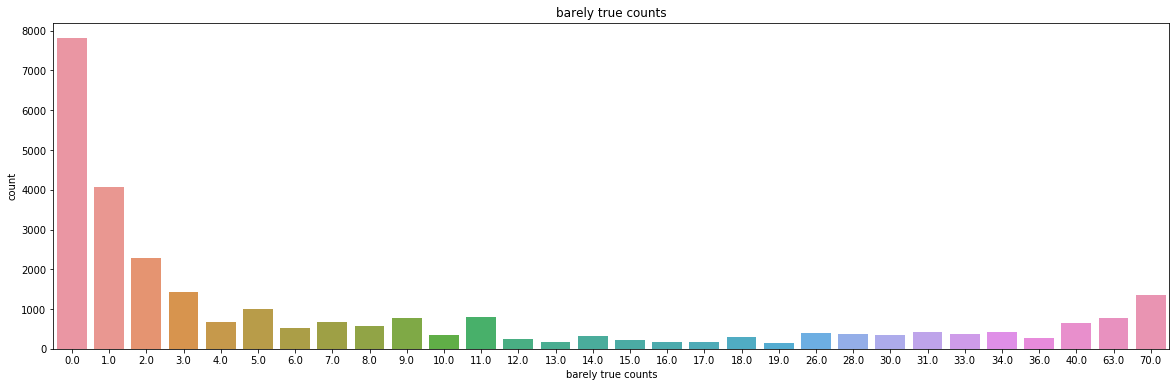

In [458]:
# barely true counts
plt.figure(figsize=(20, 6))
sns.countplot(data["barely true counts"])
plt.title('barely true counts')
plt.show()

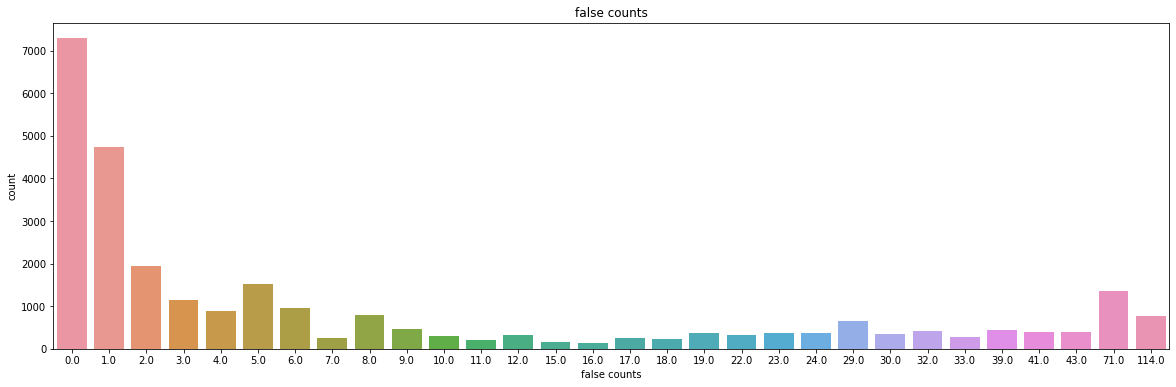

In [459]:
# false counts
plt.figure(figsize=(20, 6))
sns.countplot(data["false counts"])
plt.title('false counts')
plt.show()

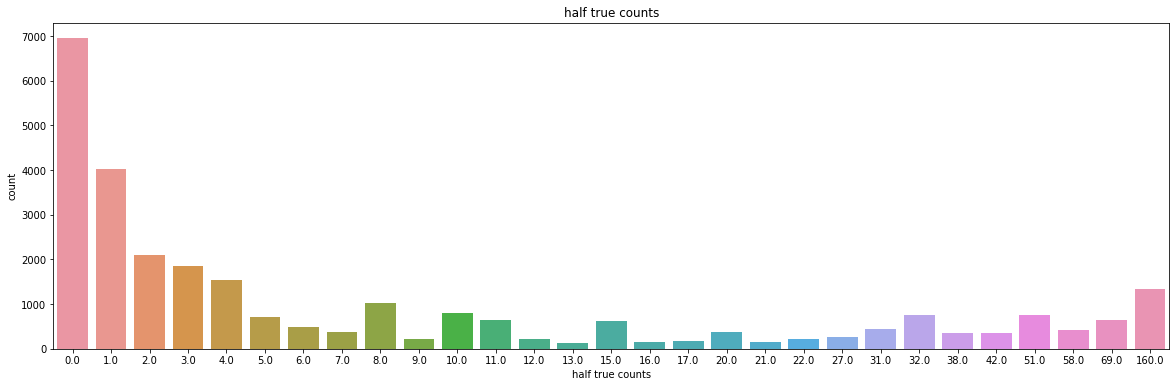

In [460]:
# half true counts
plt.figure(figsize=(20, 6))
sns.countplot(data["half true counts"])
plt.title('half true counts')
plt.show()

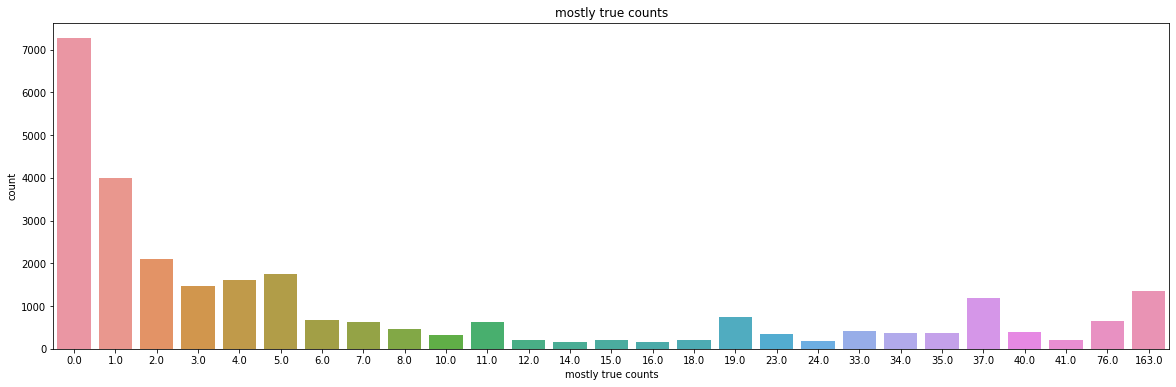

In [461]:
# mostly true counts
plt.figure(figsize=(20, 6))
sns.countplot(data["mostly true counts"])
plt.title('mostly true counts')
plt.show()

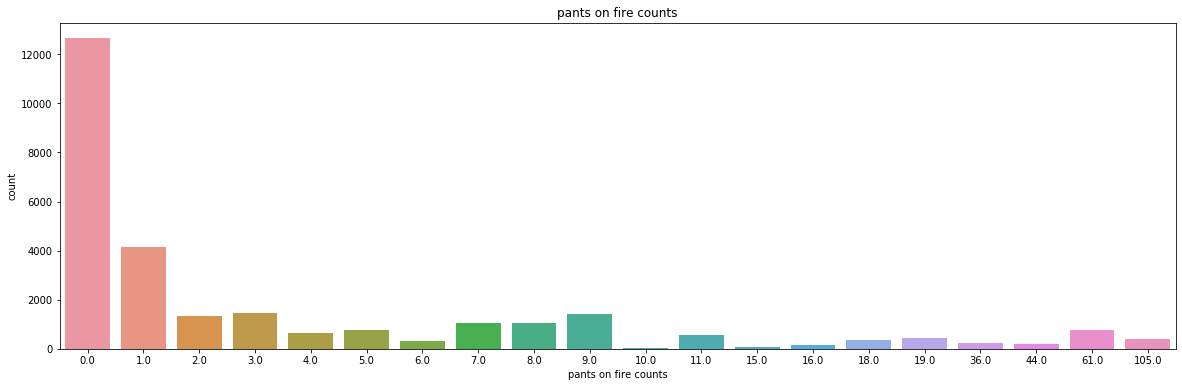

In [462]:
# pants on fire counts 
plt.figure(figsize=(20, 6))
sns.countplot(data["pants on fire counts"])
plt.title('pants on fire counts')
plt.show()

<Figure size 2160x2160 with 0 Axes>

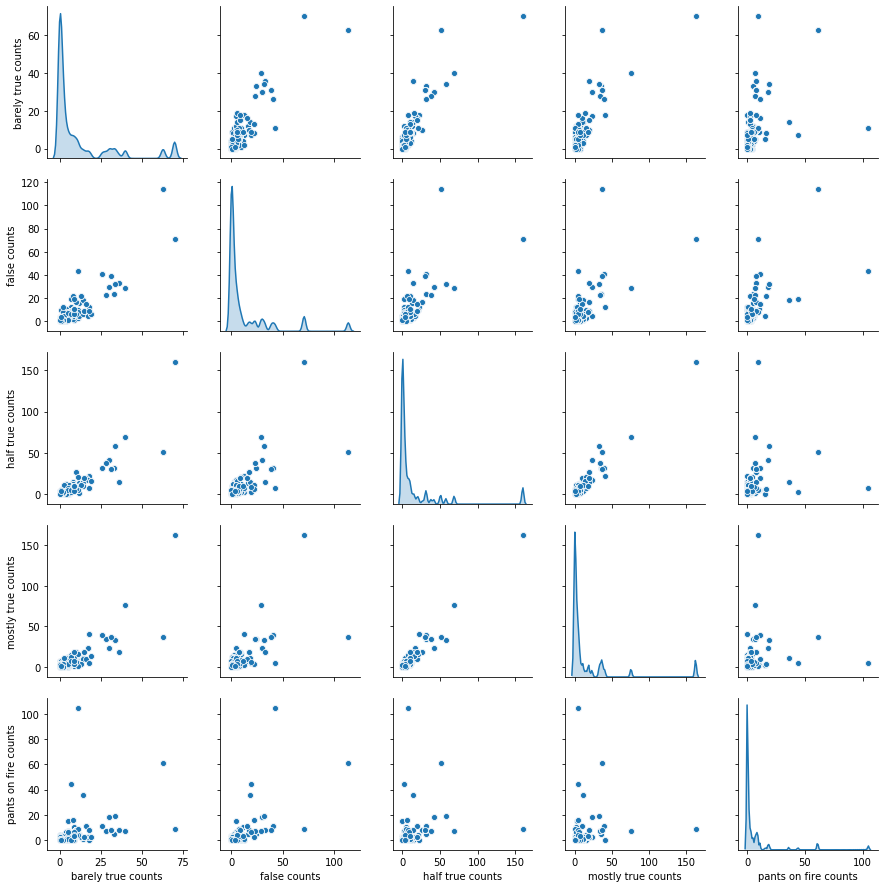

In [463]:
# Pairplot for cross visualisation of continuous variables
plt.figure(figsize=(30,30))
sns.pairplot(data, diag_kind='kde');

- Spread of Target Variable

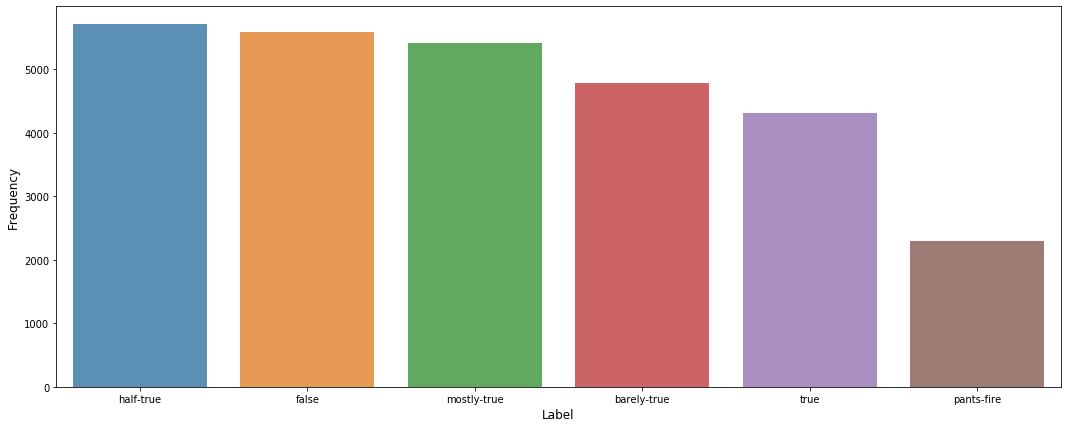

In [464]:
cnt_srs = data['Label'].value_counts()
plt.figure(figsize=(18,7))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

# Data Preprocessing

- Checking Missing Values

In [0]:
def missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_df = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])
    return missing_df

In [466]:
x_data = missing_value(data)
x_data

,Total,Percent
Speaker's job title,670,2.385870
state info,541,1.926501
the context (venue/location of speech or statement),29,0.103269
pants on fire counts,0,0.000000
mostly true counts,0,0.000000
half true counts,0,0.000000
false counts,0,0.000000
barely true counts,0,0.000000
party affiliation,0,0.000000
Speaker,0,0.000000


We need to treat the missing values here. It will reduce the model accuracy otherwise.

In [0]:
# Filling Missing Values with Unknown Variable
values = {"Speaker's job title":'Unknown'}
data = data.fillna(value=values)
#valid = valid.fillna(value=values)

In [0]:
# Filling Missing Values with Unknown Variable
values = {"state info":'Unknown1'}
data = data.fillna(value=values)
#valid = valid.fillna(value=values)

In [0]:
data['the context (venue/location of speech or statement)'].fillna(data['the context (venue/location of speech or statement)'].mode()[0], inplace=True)
#valid['the context (venue/location of speech or statement)'].fillna(valid['the context (venue/location of speech or statement)'].mode()[0], inplace=True)

In [0]:
data['pants on fire counts'].fillna(data['pants on fire counts'].median(), inplace=True)
data['mostly true counts'].fillna(data['mostly true counts'].median(), inplace=True)
data['half true counts'].fillna(data['half true counts'].median(), inplace=True)
data['false counts'].fillna(data['false counts'].median(), inplace=True)
data['barely true counts'].fillna(data['barely true counts'].median(), inplace=True)
data['party affiliation'].fillna(data['party affiliation'].mode()[0], inplace=True)
data['Speaker'].fillna(data['Speaker'].mode()[0], inplace=True)
data['Subject(s)'].fillna(data['Subject(s)'].mode()[0], inplace=True)

In [471]:
# Checking again for missing values
y_data = missing_value(data)
y_data

,Total,Percent
the context (venue/location of speech or statement),0,0.0
pants on fire counts,0,0.0
mostly true counts,0,0.0
half true counts,0,0.0
false counts,0,0.0
barely true counts,0,0.0
party affiliation,0,0.0
state info,0,0.0
Speaker's job title,0,0.0
Speaker,0,0.0


- Targeting Statement Column

In [472]:
data.shape

(28082, 14)

In [0]:
#removing non-letter symbols and converting text in 'Statement' to lowercase 
data['Statement'] = data['Statement'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]", '',str(x))))
#valid['Statement'] = valid['Statement'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))

# lower casing the Text
data['Statement'] = data['Statement'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [0]:
#Removing punctuations
#adding characters list which needs to remove that is PUNCTUATION
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'/','<','>','br','�','^','XX','XXXX','xxxx','xx']
#removing extra characters
data['Statement'] = data['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))

In [0]:
import nltk

In [476]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
#removal of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Statement'] = data['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [0]:
#common words removal
freq_data = pd.Series(' '.join(data['Statement']).split()).value_counts()[:10]
#freq_valid = pd.Series(' '.join(valid['Statement']).split()).value_counts()[:10]

freq_data = list(freq_data.index)
data['Statement'] = data['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_data))
#freq_valid = list(freq_valid.index)
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_valid))

In [0]:
#rare words removal
freq_data_rare = pd.Series(' '.join(data['Statement']).split()).value_counts()[-10:]
freq_data_rare = list(freq_data_rare.index)
data['Statement'] = data['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_data_rare))
#freq_valid_rare = pd.Series(' '.join(valid['Statement']).split()).value_counts()[-10:]
#freq_valid_rare = list(freq_valid_rare.index)
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_valid_rare))

In [0]:
#STEMMING
st = PorterStemmer()
data['Statement']=data['Statement'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))


In [481]:
data.head()

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540,half-true,declin coal start start natur ga took start be...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324,mostly-true,hillari clinton agr john mccain give georg bus...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123,false,reform legisl like mandat free sex chang surgeri,health-care,blog-posting,Unknown,Unknown1,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028,half-true,econom turnaround start end term,"economy,jobs",charlie-crist,Unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465,true,chicago bear start quarterback total number te...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [0]:
# Removing .json extension
data['ID'] = data['ID'].str.rstrip('.json')

In [0]:
#ID = data.iloc[:,[1]]
#data=data.drop(['ID'], axis=1)

In [484]:
data.columns

Index(['ID', 'Label', 'Statement', 'Subject(s)', 'Speaker',
       'Speaker's job title', 'state info', 'party affiliation',
       'barely true counts', 'false counts', 'half true counts',
       'mostly true counts', 'pants on fire counts',
       'the context (venue/location of speech or statement)'],
      dtype='object')

In [0]:
labelencoder.fit(data.iloc[:,1].values)
data.iloc[:,1]=labelencoder.transform(data.iloc[:,1])

In [495]:
data.head()

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540,2,declin coal start start natur ga took start be...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324,3,hillari clinton agr john mccain give georg bus...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123,1,reform legisl like mandat free sex chang surgeri,health-care,blog-posting,Unknown,Unknown1,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028,2,econom turnaround start end term,"economy,jobs",charlie-crist,Unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465,5,chicago bear start quarterback total number te...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [0]:
# Train test split before by random_seed=fixed


# k-Fold Cross Validation

X = data.iloc[:, [2, 3,4,5,6,7,8,9,10,11,12,13]]
y = data.iloc[:, 1]

In [497]:
y.head()

0    2
1    3
2    1
3    2
4    5
Name: Label, dtype: int64

In [498]:
type(y)

pandas.core.series.Series

In [499]:
print(y.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282],
           dtype='int64', length=28082)


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [0]:
X_train_1 = X_train
X_test_1 = X_test
y_train_1 = y_train
y_test_1 = y_test

In [537]:
y_train.head()

232     5
310     2
946     0
9990    0
4277    0
Name: Label, dtype: int64

In [502]:
y_test.head()

6692    0
984     0
1111    1
1154    2
429     1
Name: Label, dtype: int64

In [0]:
X_train_cat = X_train.loc[:,['Speaker',"Speaker's job title",'state info','party affiliation','the context (venue/location of speech or statement)']]
X_test_cat = X_test.loc[:,['Speaker',"Speaker's job title",'state info','party affiliation','the context (venue/location of speech or statement)']]

In [504]:
X_train_cat.head()

,Speaker,Speaker's job title,state info,party affiliation,the context (venue/location of speech or statement)
232,nina-turner,State senator,Ohio,democrat,an opinion column
310,scott-walker,Milwaukee County Executive,Wisconsin,republican,a speech
946,pat-robertson,Religious broadcaster,Virginia,republican,a TV broadcast
9990,tom-cotton,U.S. House of Representatives,Arkansas,republican,a House floor speech
4277,tom-barrett,Mayor of Milwaukee,Wisconsin,democrat,an interview


In [505]:
X_test_cat.head()

,Speaker,Speaker's job title,state info,party affiliation,the context (venue/location of speech or statement)
6692,chain-email,Unknown,Unknown1,none,a chain e-mail
984,barack-obama,President,Illinois,democrat,a speech at a memorial service in Dallas
1111,ted-cruz,Senator,Texas,republican,a press conference at Lackland Air Force Base
1154,michael-sullivan,"president and ceo, Empower Texans",Texas,republican,a Twitter post
429,debbie-wasserman-schultz,"U.S. Representative, Florida District 23",Florida,democrat,an interview with political commentator Roland...


In [506]:
X_train_cat.shape, X_test_cat.shape

((22465, 5), (5617, 5))

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

In [0]:
X_train_cat = X_train.loc[:,['Speaker',"Speaker's job title",'state info','party affiliation','the context (venue/location of speech or statement)']]
X_test_cat = X_test.loc[:,['Speaker',"Speaker's job title",'state info','party affiliation','the context (venue/location of speech or statement)']]

In [0]:
labelencoder = LabelEncoder()
labelencoder.fit(X_train_cat.iloc[:,0].values)
X_train_cat.iloc[:,0]=labelencoder.transform(X_train_cat.iloc[:,0])

In [0]:
labelencoder.fit(X_test_cat.iloc[:,0].values)
X_test_cat.iloc[:,0]=labelencoder.transform(X_test_cat.iloc[:,0])

In [0]:
labelencoder.fit(X_train_cat.iloc[:,1].values)
X_train_cat.iloc[:,1]=labelencoder.transform(X_train_cat.iloc[:,1])

In [0]:
labelencoder.fit(X_test_cat.iloc[:,1].values)
X_test_cat.iloc[:,1]=labelencoder.transform(X_test_cat.iloc[:,1])

In [0]:
labelencoder.fit(X_train_cat.iloc[:,2].values)
X_train_cat.iloc[:,2]=labelencoder.transform(X_train_cat.iloc[:,2])

In [0]:
labelencoder.fit(X_test_cat.iloc[:,2].values)
X_test_cat.iloc[:,2]=labelencoder.transform(X_test_cat.iloc[:,2])

In [0]:
labelencoder.fit(X_train_cat.iloc[:,3].values)
X_train_cat.iloc[:,3]=labelencoder.transform(X_train_cat.iloc[:,3])

In [0]:
labelencoder.fit(X_test_cat.iloc[:,3].values)
X_test_cat.iloc[:,3]=labelencoder.transform(X_test_cat.iloc[:,3])

In [0]:
labelencoder.fit(X_train_cat.iloc[:,4].values)
X_train_cat.iloc[:,4]=labelencoder.transform(X_train_cat.iloc[:,4])

In [0]:
labelencoder.fit(X_test_cat.iloc[:,4].values)
X_test_cat.iloc[:,4]=labelencoder.transform(X_test_cat.iloc[:,4])

In [519]:
X_train_cat.head()

,Speaker,Speaker's job title,state info,party affiliation,the context (venue/location of speech or statement)
232,2102,906,46,6,3470
310,2564,557,80,19,1888
946,2177,750,70,19,627
9990,2814,962,3,19,454
4277,2809,524,80,6,2875


In [520]:
X_test_cat.head()

,Speaker,Speaker's job title,state info,party affiliation,the context (venue/location of speech or statement)
6692,216,529,47,13,451
984,93,348,14,5,904
1111,1375,423,45,15,765
1154,981,615,45,15,312
429,354,511,10,5,1521


In [0]:
#x = x_data(data)  #data set

In [0]:
#x1 = x_data(data)

In [0]:
#x.shape, x1.shape

In [0]:
X_train_cont = X_train.loc[:,['barely true counts','false counts',"half true counts",'mostly true counts','pants on fire counts']]
X_test_cont = X_test.loc[:,['barely true counts','false counts',"half true counts",'mostly true counts','pants on fire counts']]

In [525]:
X_train_cont.head()

,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts
232,1.0,0.0,0.0,0.0,0.0
310,26.0,41.0,32.0,40.0,11.0
946,1.0,0.0,0.0,0.0,1.0
9990,3.0,4.0,2.0,3.0,1.0
4277,2.0,5.0,8.0,5.0,3.0


In [526]:
X_test_cont.head()

,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts
6692,11.0,43.0,8.0,5.0,105.0
984,70.0,71.0,160.0,163.0,9.0
1111,36.0,33.0,15.0,19.0,8.0
1154,1.0,0.0,3.0,1.0,0.0
429,7.0,9.0,8.0,15.0,3.0


In [0]:
X_train_text = X_train.loc[:,['Statement']]
X_test_text = X_test.loc[:,['Statement']]

In [528]:
X_train_text.head()

,Statement
232,collect net worth taken trillion hit mainli du...
310,son target facebook outofst protest
946,attend islam madrassa
9990,bare four offic five jihadist reach target uni...
4277,report project approxim half public employ liv...


In [529]:
X_test_text.head()

,Statement
6692,ad trillion debt term trillion ad previou combin
984,flood commun mani gun easier teenag buy glock ...
1111,say children come us stagger number barack oba...
1154,director nasa main mission muslim outreach
429,advoc requir voter show id card poll want lite...


In [530]:
y_train.head()

232     5
310     2
946     0
9990    0
4277    0
Name: Label, dtype: int64

In [531]:
y_test.head()

6692    0
984     0
1111    1
1154    2
429     1
Name: Label, dtype: int64

In [0]:
#pd.DataFrame(y_data).nunique()

In [0]:
# Converting the Text into list
stat_data_train = X_train_text['Statement'].tolist()
stat_data_test = X_test_text['Statement'].tolist()
#stat_test = test['Statement'].tolist()

# Adding data and test data
lis_stat = stat_data_train + stat_data_test

In [561]:
#Fitting TFIDF on summary
tfv_sum = TfidfVectorizer(max_features=5000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
# Fitting TF-IDF to both dataing and data sets (semi-supervised learning)
tfv_sum.fit(lis_stat)
print(tfv_sum.vocabulary_)
print(tfv_sum.idf_)
xtrain_tfv_sum =  tfv_sum.transform(stat_data_train).toarray()
xtest_tfv_sum = tfv_sum.transform(stat_data_test).toarray()
type(xtrain_tfv_sum)

{'collect': 836, 'net': 2988, 'worth': 4966, 'taken': 4410, 'trillion': 4626, 'hit': 2089, 'mainli': 2665, 'plummet': 3397, 'home': 2108, 'valu': 4777, 'son': 4158, 'target': 4422, 'facebook': 1572, 'outofst': 3178, 'protest': 3556, 'attend': 288, 'islam': 2312, 'madrassa': 2657, 'bare': 356, 'offic': 3104, 'jihadist': 2358, 'reach': 3639, 'unit': 4724, 'compar': 869, 'zero': 4996, 'seven': 4022, 'georg': 1835, 'bush': 589, 'report': 3742, 'project': 3532, 'approxim': 226, 'half': 1971, 'public': 3570, 'employ': 1436, 'live': 2598, 'outsid': 3184, 'municip': 2939, 'decad': 1112, 'ban': 344, 'local': 2607, 'resid': 3761, 'requir': 3756, 'senat': 3997, 'oppon': 3143, 'tommi': 4551, 'thompson': 4511, 'favor': 1609, 'rai': 3611, 'small': 4123, 'busi': 592, 'dwight': 1367, 'eisenhow': 1405, 'million': 2842, 'illeg': 2175, 'immigr': 2180, 'countri': 993, 'american': 159, 'want': 4853, 'care': 642, 'option': 3149, 'virginia': 4821, 'invest': 2288, 'educ': 1394, 'highest': 2068, 'level': 2558,

numpy.ndarray

In [535]:
xtrain_tfv_sum.shape

(22465, 5000)

In [0]:
X_train = np.concatenate((X_train_cont, xtrain_tfv_sum,X_train_cat),axis = 1)
#x_data = np.concatenate((x1, xdata_tfv_sum, rest_df_data),axis = 1)

In [0]:
X_test = np.concatenate((X_test_cont, xtest_tfv_sum,X_test_cat),axis = 1)

In [552]:
X_train.shape, X_test.shape

((22465, 5010), (5617, 5010))

In [553]:
X_train

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 4.600e+01, 6.000e+00,
        3.470e+03],
       [2.600e+01, 4.100e+01, 3.200e+01, ..., 8.000e+01, 1.900e+01,
        1.888e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 7.000e+01, 1.900e+01,
        6.270e+02],
       ...,
       [3.100e+01, 3.900e+01, 3.100e+01, ..., 2.000e+00, 1.900e+01,
        8.600e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.500e+01, 6.000e+00,
        3.382e+03],
       [5.000e+00, 4.000e+00, 2.000e+00, ..., 6.500e+01, 1.900e+01,
        1.953e+03]])

In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [564]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)

0.5457407580103398

In [565]:
print('Mean Absolute Error for Naive Bayes %2f' %(-1 * accuracies.mean()))

Mean Absolute Error -0.545741


In [0]:
ans = labelencoder.inverse_transform(y_pred)
type(ans)
ans = pd.DataFrame(ans)

**Trying Logistic Regression Too**

In [568]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=0,C=10)
classifier.fit(X_train, y_train)
y_pred1 = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)

In [576]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

In [578]:
print('Mean Absolute Error for Logistic Regression %2f' %(-1 * accuracies1.mean()))

Mean Absolute Error for Logistic Regression -0.245670


In [0]:
ans1 = labelencoder.inverse_transform(y_pred1)
type(ans1)
ans1 = pd.DataFrame(ans1)

In [0]:
######################################################################################################